In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras import activations
from keras import optimizers
from keras import layers
from keras import losses
from keras.models import Sequential, Model
from keras.layers import Input, Dense, Activation, Dropout
from sklearn.datasets import load_diabetes

In [ ]:
# Useful links:
# All official Keras guides: https://keras.io/guides/

# Building a model
# Sequential (class-based) guide: https://keras.io/guides/sequential_model/
# Functional guide: https://keras.io/guides/functional_api/

# Layers
# Activation functions: https://keras.io/api/layers/activations/
# Initializers https://keras.io/api/layers/initializers/

# Compilation
# Losses: https://keras.io/api/losses/
# Optimizers: https://keras.io/api/optimizers/

In [3]:
# Load some toy data
diabetes = load_diabetes(as_frame=True)

In [4]:
X = diabetes.data

In [5]:
y = diabetes.target

In [6]:
X

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [7]:
y

0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: target, Length: 442, dtype: float64

In [48]:
# Sequential model - class based
# https://keras.io/api/models/sequential/
# Input has to match the columns in your X 
input_shape = (10,)
# Takes a list of layers
model = keras.Sequential(
    [
#         keras.Input(shape=input_shape),
        layers.Dense(100, input_shape=input_shape, activation="relu"),
        layers.Dense(100, activation="relu"),
        layers.Dropout(.5),
        layers.Dense(100, activation="relu"),
        layers.Dense(1, activation="linear"),
    ]
)
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_60 (Dense)            (None, 100)               1100      
                                                                 
 dense_61 (Dense)            (None, 100)               10100     
                                                                 
 dropout_15 (Dropout)        (None, 100)               0         
                                                                 
 dense_62 (Dense)            (None, 100)               10100     
                                                                 
 dense_63 (Dense)            (None, 1)                 101       
                                                                 
Total params: 21,401
Trainable params: 21,401
Non-trainable params: 0
_________________________________________________________________


In [49]:
X.iloc[0].values

array([ 0.03807591,  0.05068012,  0.06169621,  0.02187239, -0.0442235 ,
       -0.03482076, -0.04340085, -0.00259226,  0.01990749, -0.01764613])

In [50]:
model.compile(loss='mean_squared_error', optimizer="adam")

In [51]:
model.fit(X, y, batch_size=16, epochs=100, validation_split=0.2)

Epoch 1/100
23/23 [==============================] - 0s 3ms/step - loss: 28655.6680 - val_loss: 30048.7051
Epoch 2/100
23/23 [==============================] - 0s 1ms/step - loss: 27764.7227 - val_loss: 27743.4316
Epoch 3/100
23/23 [==============================] - 0s 1ms/step - loss: 22628.7520 - val_loss: 17323.7227
Epoch 4/100
23/23 [==============================] - 0s 1ms/step - loss: 9850.4766 - val_loss: 5107.3242
Epoch 5/100
23/23 [==============================] - 0s 1ms/step - loss: 4923.7534 - val_loss: 4444.0381
Epoch 6/100
23/23 [==============================] - 0s 1ms/step - loss: 4183.1377 - val_loss: 4097.5981
Epoch 7/100
23/23 [==============================] - 0s 1ms/step - loss: 4028.3752 - val_loss: 3847.7185
Epoch 8/100
23/23 [==============================] - 0s 1ms/step - loss: 3637.2861 - val_loss: 3721.4666
Epoch 9/100
23/23 [==============================] - 0s 1ms/step - loss: 4071.8347 - val_loss: 3644.9382
Epoch 10/100
23/23 [=============================

23/23 [==============================] - 0s 1ms/step - loss: 3199.3430 - val_loss: 2918.6038
Epoch 79/100
23/23 [==============================] - 0s 1ms/step - loss: 2918.9844 - val_loss: 2919.8174
Epoch 80/100
23/23 [==============================] - 0s 1ms/step - loss: 3160.5825 - val_loss: 2930.6096
Epoch 81/100
23/23 [==============================] - 0s 1ms/step - loss: 3046.5415 - val_loss: 2902.3169
Epoch 82/100
23/23 [==============================] - 0s 1ms/step - loss: 3271.8601 - val_loss: 2973.2910
Epoch 83/100
23/23 [==============================] - 0s 1ms/step - loss: 2914.9849 - val_loss: 2926.7390
Epoch 84/100
23/23 [==============================] - 0s 1ms/step - loss: 3108.9661 - val_loss: 2906.5708
Epoch 85/100
23/23 [==============================] - 0s 1ms/step - loss: 3121.7124 - val_loss: 2920.5347
Epoch 86/100
23/23 [==============================] - 0s 1ms/step - loss: 2945.4668 - val_loss: 2955.7141
Epoch 87/100
23/23 [==============================] - 0s 1m

In [53]:
# You can also construct a Sequential model this way
model = Sequential()

In [55]:
model.add(Dense(10, input_shape=(10,), activation=activations.relu))
model.add(Dense(10, activation=activations.relu))
model.add(Dense(1, activation=activations.linear))

In [56]:
model.compile(loss=losses.mean_squared_error, optimizer=optimizers.Adam())

In [57]:
model.fit(X, y, batch_size=16, epochs=100, validation_split=0.2)

Epoch 1/100
23/23 [==============================] - 0s 2ms/step - loss: 28738.1191 - val_loss: 30333.9883
Epoch 2/100
23/23 [==============================] - 0s 987us/step - loss: 28703.4141 - val_loss: 30293.4551
Epoch 3/100
23/23 [==============================] - 0s 1ms/step - loss: 28656.5039 - val_loss: 30237.9102
Epoch 4/100
23/23 [==============================] - 0s 967us/step - loss: 28593.4160 - val_loss: 30163.5645
Epoch 5/100
23/23 [==============================] - 0s 1ms/step - loss: 28509.0898 - val_loss: 30063.4531
Epoch 6/100
23/23 [==============================] - 0s 1ms/step - loss: 28395.3633 - val_loss: 29926.0645
Epoch 7/100
23/23 [==============================] - 0s 974us/step - loss: 28239.8926 - val_loss: 29737.4414
Epoch 8/100
23/23 [==============================] - 0s 995us/step - loss: 28026.0703 - val_loss: 29490.2051
Epoch 9/100
23/23 [==============================] - 0s 904us/step - loss: 27753.7422 - val_loss: 29171.3457
Epoch 10/100
23/23 [=======

Epoch 77/100
23/23 [==============================] - 0s 1ms/step - loss: 3549.4861 - val_loss: 3889.4407
Epoch 78/100
23/23 [==============================] - 0s 972us/step - loss: 3535.8279 - val_loss: 3877.1001
Epoch 79/100
23/23 [==============================] - 0s 970us/step - loss: 3525.6865 - val_loss: 3867.8015
Epoch 80/100
23/23 [==============================] - 0s 1ms/step - loss: 3515.7627 - val_loss: 3850.3628
Epoch 81/100
23/23 [==============================] - 0s 954us/step - loss: 3504.7642 - val_loss: 3835.2002
Epoch 82/100
23/23 [==============================] - 0s 1ms/step - loss: 3494.0386 - val_loss: 3822.9509
Epoch 83/100
23/23 [==============================] - 0s 932us/step - loss: 3482.1680 - val_loss: 3812.3896
Epoch 84/100
23/23 [==============================] - 0s 1ms/step - loss: 3473.4724 - val_loss: 3801.8037
Epoch 85/100
23/23 [==============================] - 0s 1ms/step - loss: 3466.1211 - val_loss: 3787.2397
Epoch 86/100
23/23 [==================

In [60]:
# Example of currying
(lambda x: x**2)(4)

16

In [67]:
# The functional API - each layer is passed into the next and a 
# Model object is instantiated with the input and output layers
input = Input(shape=(10,))
f = Dense(100, activation="relu")(input)
g = Dense(100, activation="relu")(f)
output = Dense(1, activation="linear")(g)

In [68]:
model = Model(input, output)

In [69]:
type(model)

keras.engine.functional.Functional

In [70]:
model.compile(loss='mean_squared_error', optimizer="adam")

In [71]:
model.fit(X, y, batch_size=16, epochs=100, validation_split=0.2)

Epoch 1/100
23/23 [==============================] - 0s 3ms/step - loss: 28689.1816 - val_loss: 30193.6816
Epoch 2/100
23/23 [==============================] - 0s 986us/step - loss: 28382.6406 - val_loss: 29612.8398
Epoch 3/100
23/23 [==============================] - 0s 1ms/step - loss: 27422.2773 - val_loss: 28046.4082
Epoch 4/100
23/23 [==============================] - 0s 1ms/step - loss: 25211.8242 - val_loss: 24889.9355
Epoch 5/100
23/23 [==============================] - 0s 1ms/step - loss: 21338.8184 - val_loss: 19720.0176
Epoch 6/100
23/23 [==============================] - 0s 1ms/step - loss: 15761.0166 - val_loss: 13597.6152
Epoch 7/100
23/23 [==============================] - 0s 1ms/step - loss: 9979.7178 - val_loss: 8291.0469
Epoch 8/100
23/23 [==============================] - 0s 1ms/step - loss: 5911.1875 - val_loss: 5320.9980
Epoch 9/100
23/23 [==============================] - 0s 1ms/step - loss: 4351.3228 - val_loss: 4611.3384
Epoch 10/100
23/23 [=====================

23/23 [==============================] - 0s 1ms/step - loss: 2850.6362 - val_loss: 3004.9158
Epoch 79/100
23/23 [==============================] - 0s 1ms/step - loss: 2861.7478 - val_loss: 2996.8467
Epoch 80/100
23/23 [==============================] - 0s 1ms/step - loss: 2847.4087 - val_loss: 2993.3865
Epoch 81/100
23/23 [==============================] - 0s 1ms/step - loss: 2891.7634 - val_loss: 3002.1472
Epoch 82/100
23/23 [==============================] - 0s 1ms/step - loss: 2848.8169 - val_loss: 2991.5032
Epoch 83/100
23/23 [==============================] - 0s 991us/step - loss: 2849.4397 - val_loss: 2986.3447
Epoch 84/100
23/23 [==============================] - 0s 1000us/step - loss: 2845.6877 - val_loss: 2986.1616
Epoch 85/100
23/23 [==============================] - 0s 1ms/step - loss: 2849.9353 - val_loss: 2985.3862
Epoch 86/100
23/23 [==============================] - 0s 1ms/step - loss: 2851.0823 - val_loss: 2987.5298
Epoch 87/100
23/23 [==============================] - 

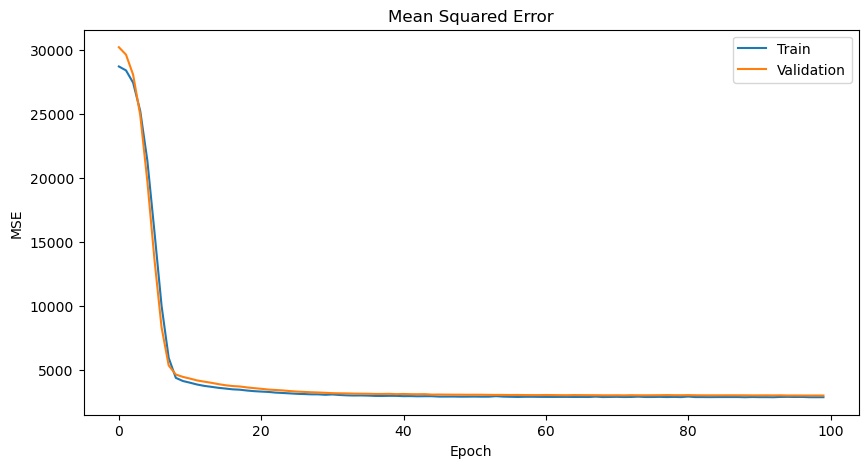

In [72]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(model.history.history['loss'], label='Train')
plt.plot(model.history.history['val_loss'], label='Validation')
plt.title('Mean Squared Error')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend()
plt.show()